In [1]:
pip install tensorflow opencv-python matplotlib tensorflow-hub


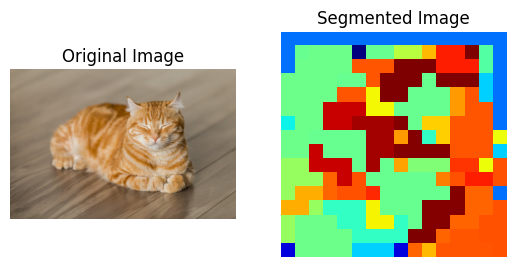

In [9]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the DeepLabV3+ model using TensorFlow Hub
model = tf.keras.applications.DenseNet201(input_shape=(None, None, 3), include_top=False)

# Load and process image
img_path = '/content/cat.jpg'  # Change to your image path
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(image, (512, 512))  # Resize image to fit model input
img_resized = img_resized / 255.0  # Normalize image (0-1)

# Convert image to tensor and add batch dimension
input_tensor = tf.convert_to_tensor(img_resized, dtype=tf.float32)
input_tensor = tf.expand_dims(input_tensor, 0)  # Add batch dimension

# Run segmentation model
output = model(input_tensor)  # Perform forward pass

# Post-process segmentation output if needed (e.g., softmax, argmax)
output = tf.argmax(output, axis=-1)  # Convert to class indices (semantic segmentation map)
output = tf.squeeze(output, axis=0)  # Remove batch dimension

# Display original and segmented image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis("off")
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(output, cmap="jet")
plt.axis("off")
plt.title("Segmented Image")

plt.show()


# Using Pytorch

In [3]:
pip install torch torchvision numpy opencv-python matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

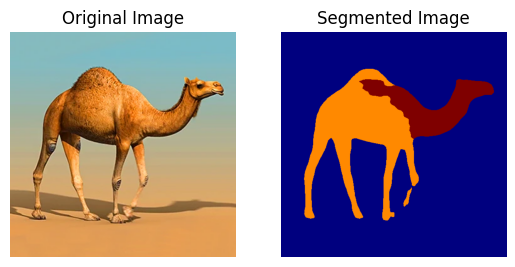

In [6]:
import torch
import torchvision.transforms as transforms
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchvision import models

# Load a pre-trained segmentation model (DeepLabV3)
model = models.segmentation.deeplabv3_resnet101(pretrained=True)
model.eval()  # Set to evaluation mode

# Load and preprocess image
img_path = '/content/camel.webp'  # Change to your image
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
transform = transforms.Compose([transforms.ToPILImage(), transforms.Resize((520, 520)), transforms.ToTensor()])
input_tensor = transform(img).unsqueeze(0)  # Add batch dimension

# Run segmentation
with torch.no_grad():
    output = model(input_tensor)['out'][0]
    output_predictions = output.argmax(0).byte().cpu().numpy()

# Display results
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(output_predictions, cmap="jet")
plt.title("Segmented Image")
plt.axis("off")

plt.show()
